# Python para análise de dados(Pandas)

In [81]:
# Importando a biblioteca pandas
import pandas as pd

In [82]:
# Lendo uma base de dados .csv presente no google drive ignorando linhas com erro e com separador sendo um ";"
df = pd.read_csv('/content/drive/MyDrive/datasets/Gapminder.csv', error_bad_lines=False, sep=";")

<ipython-input-82-5d85a5a08e4b>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/datasets/Gapminder.csv', error_bad_lines=False, sep=";")


In [83]:
# Visualizando as 5 primeiras linhas
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [84]:
# Visualizando as ultimas linhas
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
3307,Zimbabwe,Africa,1987,62.351,9216418,706.157306
3308,Zimbabwe,Africa,1992,60.377,10704340,693.420786
3309,Zimbabwe,Africa,1997,46.809,11404948,792.449960
3310,Zimbabwe,Africa,2002,39.989,11926563,672.038623
3311,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [85]:
# Renomeando as colunas
df = df.rename(columns={"country":"Pais", "continent": "Continente", "year": "Ano", "lifeExp":"Expectativa de vida","pop":"Pop Total", "gdpPercap":"PIB"})

In [86]:
# Vendo a quantidade total de linhas e colunas
df.shape

(3312, 6)

In [87]:
# Retornando o nome das colunas
df.columns

Index(['Pais', 'Continente', 'Ano', 'Expectativa de vida', 'Pop Total', 'PIB'], dtype='object')

In [88]:
# Visualizando o tipo de dado em cada coluna
# object é equivalente a string
df.dtypes

Pais                    object
Continente              object
Ano                      int64
Expectativa de vida    float64
Pop Total                int64
PIB                    float64
dtype: object

In [89]:
# Visualizando informações estatísticas discretas sobre nosso conjunto de dados
df.describe()

,Ano,Expectativa de vida,Pop Total,PIB
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165876
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


In [90]:
# Retornando valores únicos de uma dada coluna
# 'nan' significa que existem algumas linhas nulas nessa base de dados
df["Continente"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

In [91]:
# Visualizando os dados cujo Continente é Oceania
Oceania = df.loc[df['Continente'] == 'Oceania']
Oceania.head()

,Pais,Continente,Ano,Expectativa de vida,Pop Total,PIB
975,Fiji,Oceania,1962,56.494,421869,2039.393277
976,Fiji,Oceania,1967,58.607,485000,2170.073285
977,Fiji,Oceania,1972,60.642,544000,2797.759484
978,Fiji,Oceania,1977,62.669,599339,3182.569600
979,Fiji,Oceania,1982,64.683,658906,3209.257468


In [92]:
# Visualizando os países da Oceania que participaram da pesquisa
Oceania["Pais"].unique()

array(['Fiji', 'New Zealand', 'Solomon Islands'], dtype=object)

In [93]:
# Fazendo agrupamento de dados por continente e verificando quantos países tem por continente
# Quantos países tem por continente?
# Resposta:
df.groupby("Continente")["Pais"].nunique()

Continente
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: Pais, dtype: int64

In [94]:
# Para cada ano, qual a expectativa de vida média?

df.groupby("Ano")["Expectativa de vida"].mean()

Ano
1950    62.002568
1951    65.904167
1952    49.206867
1953    66.674563
1954    67.459817
1955    67.806757
1956    67.950637
1957    51.614590
1958    68.815936
1959    68.226579
1960    68.470837
1961    68.862480
1962    54.035234
1963    69.595735
1964    70.063105
1965    70.259881
1966    70.447526
1967    56.263629
1968    70.689081
1969    70.653896
1970    70.961141
1971    71.103976
1972    58.474481
1973    71.500338
1974    71.778504
1975    71.939218
1976    72.158050
1977    60.429090
1978    72.717567
1979    73.018717
1980    73.064524
1981    73.337399
1982    62.365871
1983    73.787778
1984    74.100741
1985    74.112222
1986    74.452222
1987    63.984860
1988    74.760000
1989    74.924444
1990    74.283438
1991    74.374848
1992    65.008443
1993    74.324545
1994    74.456667
1995    74.552727
1996    75.029394
1997    65.873799
1998    75.569697
1999    75.703636
2000    76.026364
2001    76.257879
2002    66.835695
2003    76.586667
2004    76.921562
2005  

In [95]:
# Outra forma de fazer o que fizemos acima
df["PIB"].mean()

11317.115804696648

In [96]:
# Soma dos PIBs
df["PIB"].sum()

37482287.5451553

# Trabalhando com Arquivos do Excel

In [97]:
# Lendo as planilhas de vendas
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [98]:
# Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [99]:
# Lendo o novo DataFrame
df.head(20)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
5,Aracaju,2018-01-01,156.20,1522,1
6,Aracaju,2018-01-01,35.50,1522,2
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3


In [100]:
# Exibindo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [101]:
# Avaliando dados estatisticos
df.describe()

,Vendas,LojaID,Qtde
count,894.000000,894.000000,894.000000
mean,122.611801,1074.844519,3.261745
std,166.818723,191.360735,2.096964
min,3.010000,852.000000,1.000000
25%,22.380000,983.000000,2.000000
50%,44.000000,1035.000000,3.000000
75%,160.925000,1037.000000,4.000000
max,886.000000,1523.000000,10.000000


In [102]:
# Pegando uma amostra de 5 linhas da base de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
20,Natal,2018-06-08,608.00,852,4
92,Recife,2019-01-01,163.02,981,4
184,Salvador,2019-01-02,167.16,1037,1
13,Recife,2019-02-12,15.33,983,5
40,Fortaleza,2019-02-13,19.13,1002,4


In [103]:
# Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [104]:
# Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [105]:
# Perceba que LojaID mudou de tipo int64 para object
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

### **Trabalhando com valores faltantes**

In [106]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

Não há valores nulos. Mas se houvesse, podemos substiutir pela média fazendo:

In [107]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace = True)

In [108]:
# Consultando novamente linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [109]:
# Substituindo valores nulos por 0
df["Vendas"].fillna(0, inplace = True)

In [110]:
# Apagando linhas com valores nulos
df["Vendas"].dropna(inplace = True)

In [111]:
# Apagando linhas com valores nulos com base em apenas uma coluna
df.dropna(subset = ["Vendas"],inplace = True)

In [112]:
# Apagando linhas com valores faltantes em todas as colunas
df.dropna(how = "all", inplace = True)

### Criando colunas novas

In [113]:
# Criando a coluna receitas = vendas * qtde. mul = multiplicação
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [114]:
df["Receita/Vendas"] = df["Receita"]/df["Vendas"]

In [115]:
# Visualizando os dados novamente
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0
5,Aracaju,2018-01-01,156.20,1522,1,156.20,1.0
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2.0
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,6.0
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1.0
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0


In [116]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [117]:
# Retornando a menor receita
df['Receita'].min()

3.34

In [118]:
# nlargest = Top 3 com base na coluna receita
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [119]:
# nlargest = Top 3 piores com base na coluna receita
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [120]:
# Agrupando por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [121]:
# Ordenando o conjunto de dados
df.sort_values("Receita", ascending = False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com Datas

In [122]:
# Transformando a coluna de dada para tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [123]:
# Verificando o tipo dos dados das colunas
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [124]:
# Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [125]:
# Verificando o tipo dos dados das colunas
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [126]:
# Agrupando os dados por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [127]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [128]:
# Gerando uma amostra com 5 registros
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
44,Fortaleza,2019-01-01,215.11,1003,1,215.11,1.0,2019
220,Salvador,2019-01-02,42.71,1035,1,42.71,1.0,2019
51,Fortaleza,2019-01-01,30.47,1005,3,91.41,3.0,2019
79,Natal,2019-02-28,557.00,852,4,2228.00,4.0,2019
68,Natal,2018-06-22,274.00,852,3,822.00,3.0,2018


In [129]:
# Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [130]:
# Retornando a data mais antiga e mais nova
print(df["Data"].min(), df["Data"].max())

2018-01-01 00:00:00 2019-04-05 00:00:00


In [131]:
# Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [132]:
# Gerando uma amostra com 5 registros
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
51,Recife,2019-01-01,146.95,982,2,293.90,2.0,2019,1,1,365 days
96,Natal,2019-01-02,42.94,1034,3,128.82,3.0,2019,1,2,366 days
88,Salvador,2019-01-01,31.20,1036,1,31.20,1.0,2019,1,1,365 days
175,Salvador,2019-01-02,16.53,1036,2,33.06,2.0,2019,1,2,366 days
123,Salvador,2019-03-02,127.45,1036,3,382.35,3.0,2019,3,2,425 days


In [133]:
# Criando a coluna de Trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [134]:
# Gerando uma amostra com 5 registros
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
154,Natal,2019-01-02,9.58,1037,1,9.58,1.0,2019,1,2,366 days,1
68,Natal,2018-06-22,274.00,852,3,822.00,3.0,2018,6,22,172 days,2
58,Fortaleza,2019-01-01,38.90,1004,4,155.60,4.0,2019,1,1,365 days,1
187,Natal,2019-01-02,3.85,1035,3,11.55,3.0,2019,1,2,366 days,1
114,Salvador,2019-03-02,25.52,1034,1,25.52,1.0,2019,3,2,425 days,1


In [135]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Visualização dos dados em gráficos

In [136]:
# Contando a quantidade de lojas com os IDs especificados
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<Axes: >

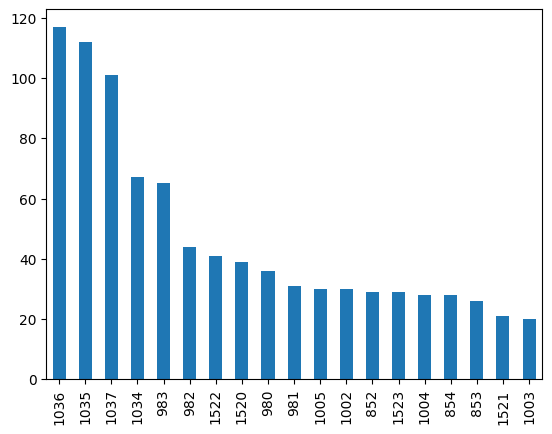

In [138]:
# Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

<Axes: >

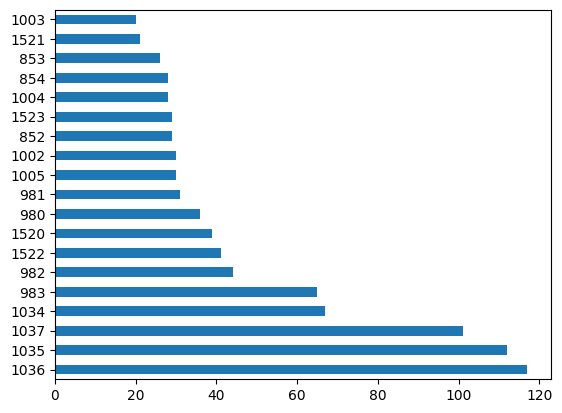

In [140]:
# Gráfico de barras horizontais sem especificar a ordem
df["LojaID"].value_counts().plot.barh()

<Axes: >

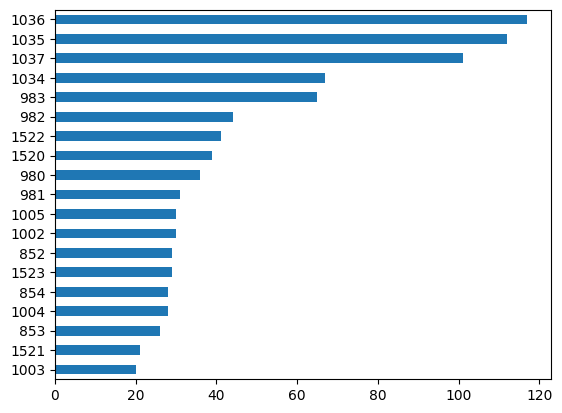

In [141]:
# Gráfico de barras horizontais ordenando do menor ao maior
df["LojaID"].value_counts(ascending=True).plot.barh()

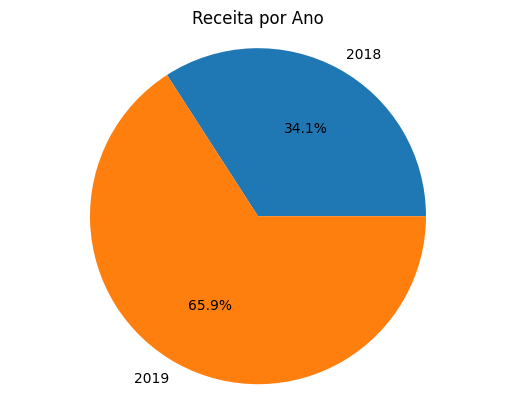

In [145]:
# Gráfico de pizza
import matplotlib.pyplot as plt

# Agrupar os dados pelo ano e calcular a soma da receita
dados_agrupados = df.groupby(df["Data"].dt.year)["Receita"].sum()

# Gerar o gráfico de pizza
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%')
plt.title('Receita por Ano')
plt.axis('equal')  # Para garantir que a pizza seja desenhada como um círculo
plt.show()

In [146]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

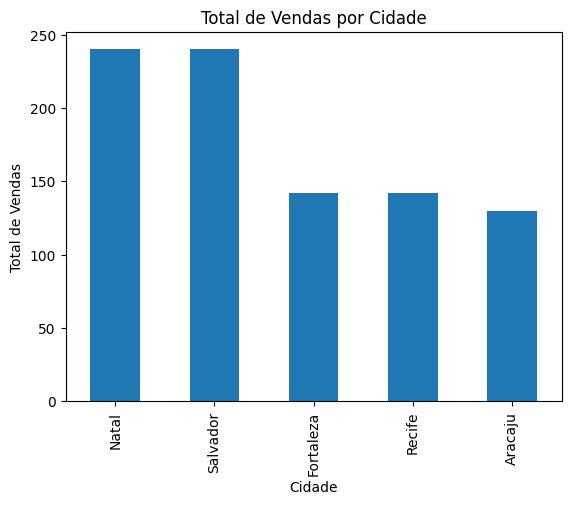

In [147]:
# Add título e alterando o número de eixos do gráfico
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

Text(0, 0.5, 'Total de Vendas')

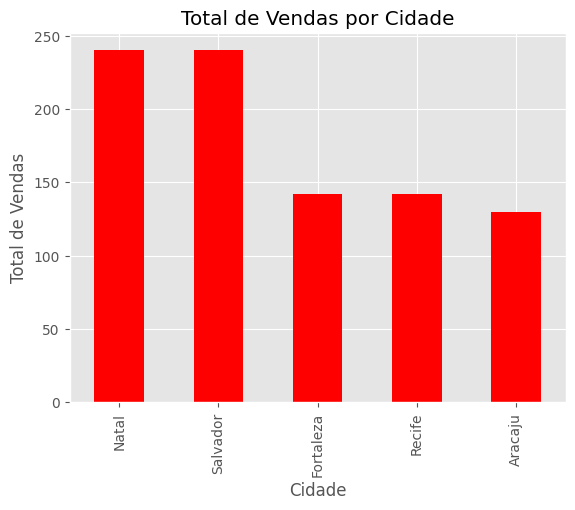

In [150]:
# Alterando a cor

df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

In [149]:
# Alterando o estilo
plt.style.use("ggplot")

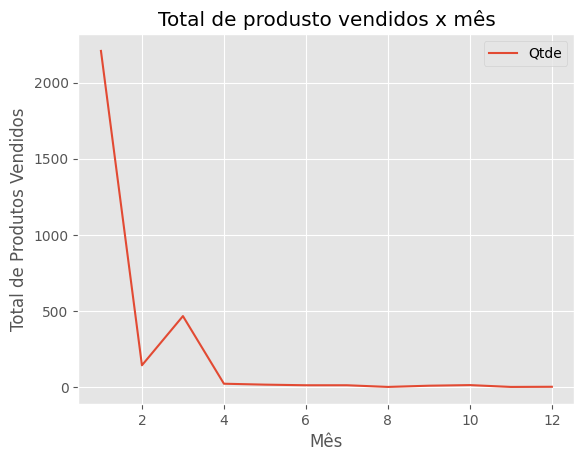

In [153]:
# Adding legenda
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de produsto vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()

In [152]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [154]:
# Selecionando apenas as vendas de 2019

df_2019 = df[df["Ano_Venda"] == 2019]

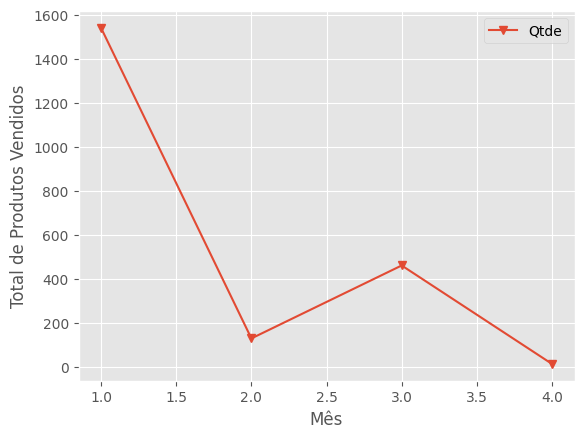

In [155]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

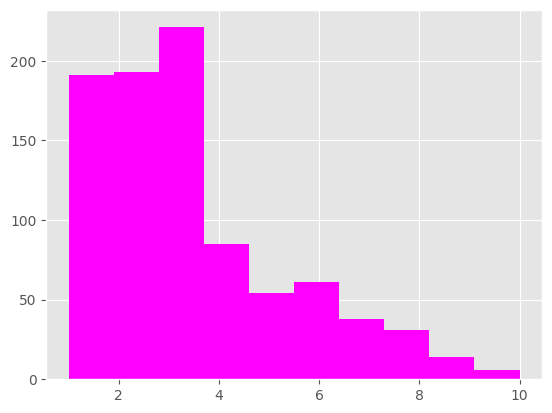

In [156]:
# Histograma
plt.hist(df["Qtde"], color="magenta")

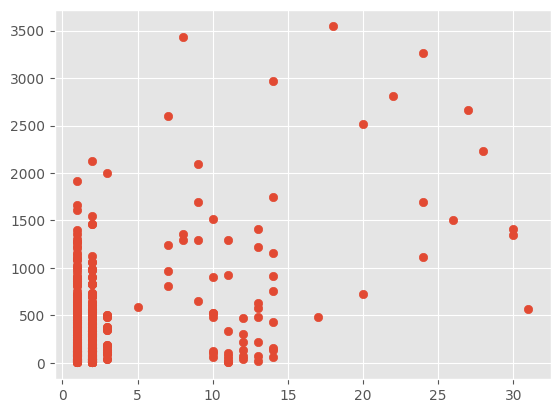

In [157]:
# Gráfico de pontos
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"])

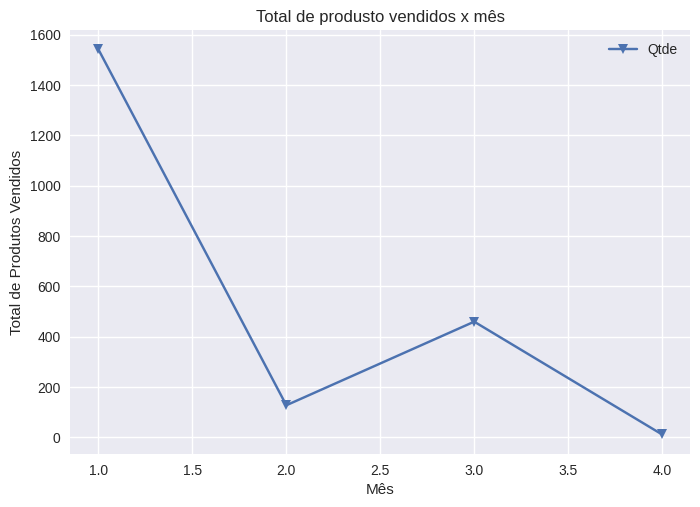

In [160]:
# Salvando em PNG
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="v")
plt.title("Total de produsto vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()
# Fica salvo na aba "Files" do Google Colab
plt.savefig("Grafico qtde x mes.png")

# Realizando uma análise exploratória de dados

In [159]:
plt.style.use("seaborn")

<ipython-input-159-4b92c22464bb>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
# Realizando upload dos arquivos usando files do google

from google.colab import files
arq = files.upload()

In [162]:
# Criando o nosso dataframe

df = pd.read_excel("/content/drive/MyDrive/datasets/AdventureWorks.xlsx")

In [163]:
# Lendo o arquivo
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [165]:
# Qtde linhas e colunas
df.shape

(904, 16)

In [166]:
# Tipos
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [167]:
# Receita total
df["Valor Venda"].sum()

5984606.1426

In [170]:
# Custo total
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [171]:
# Cálculo do custo total

round(df["Custo"].sum(), 2)

2486783.05

In [172]:
# Calculando o lucro a partir do custo e receita totais
# L = R - C
df["Lucro"] = df["Valor Venda"] - df["Custo"]
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [173]:
# Cálculo do lucro total

round(df["Lucro"].sum(), 2)

3497823.09

In [176]:
# Total de dias para enviar um produto

df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


### **Média do tempo de envio para cada Marca**

In [177]:
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [178]:
df["Tempo_envio"].dtype

dtype('int64')

In [179]:
# Média do tempo de envio por marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

### **Missing Values**

In [181]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

### **Lucro por ano e por marca**

In [183]:
# Lucro por ano e por marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [184]:
pd.options.display.float_format= '{:20,.2f}'.format

In [185]:
# Resetando o index

lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [186]:
# Total de produtos vendidos

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produtos')

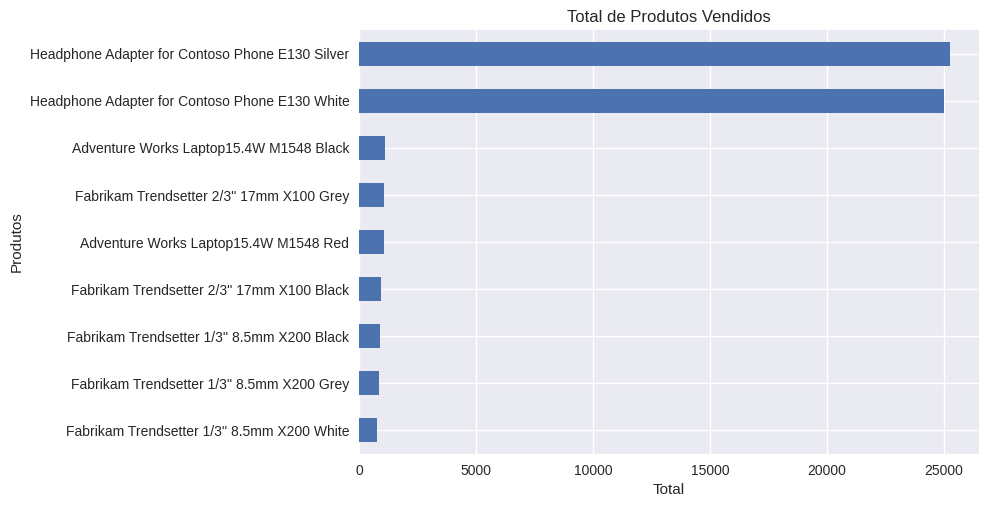

In [187]:
# Gráfico total de produtos vendidos

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produtos")

Text(0, 0.5, 'Receita')

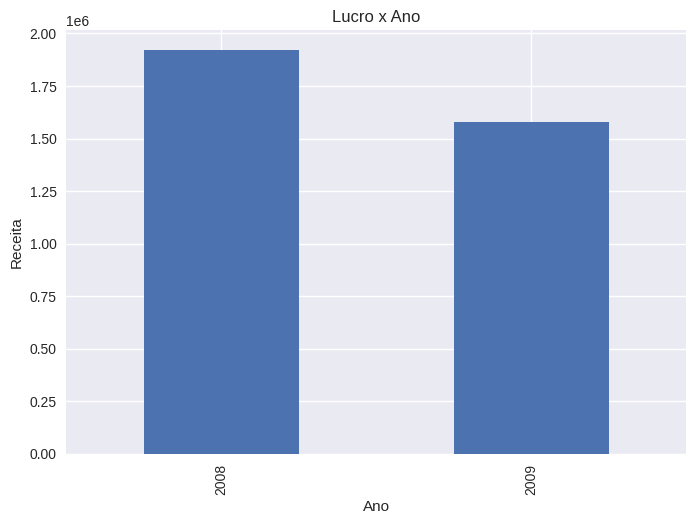

In [189]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [190]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [191]:
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

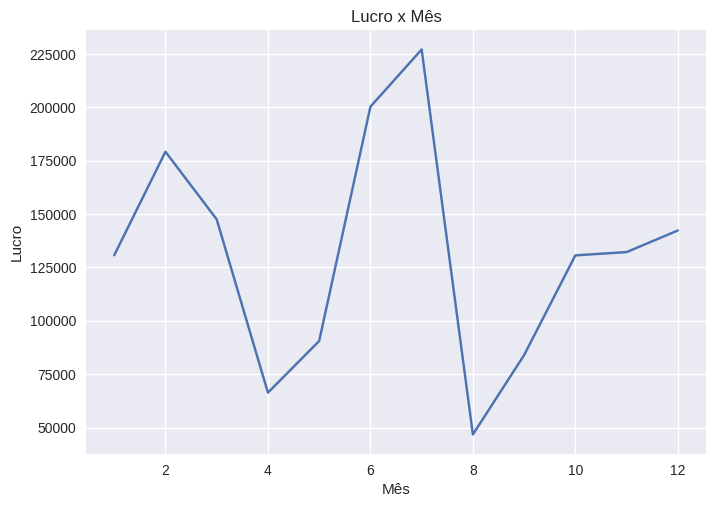

In [192]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

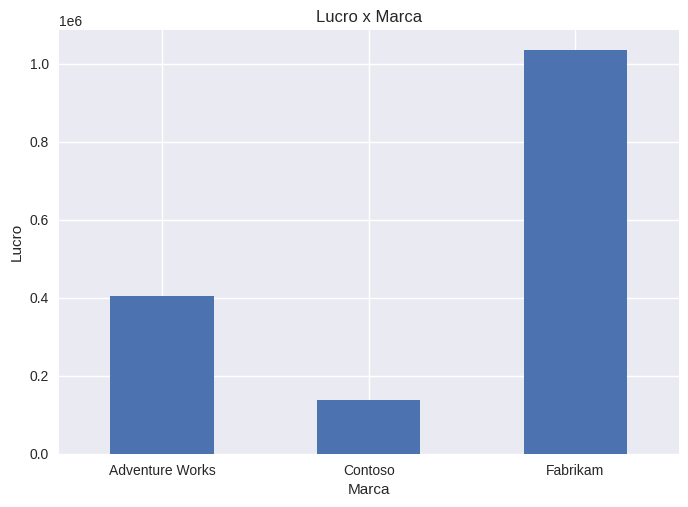

In [197]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation = "horizontal")

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

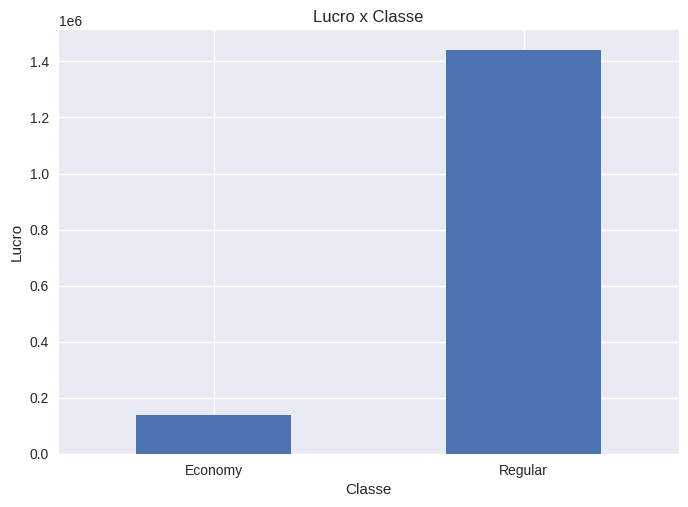

In [198]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation = "horizontal")

In [201]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f994aa0f5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f994ad0fb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f994a9629b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f994ad0da80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f994ad0e8f0>],
 'means': []}

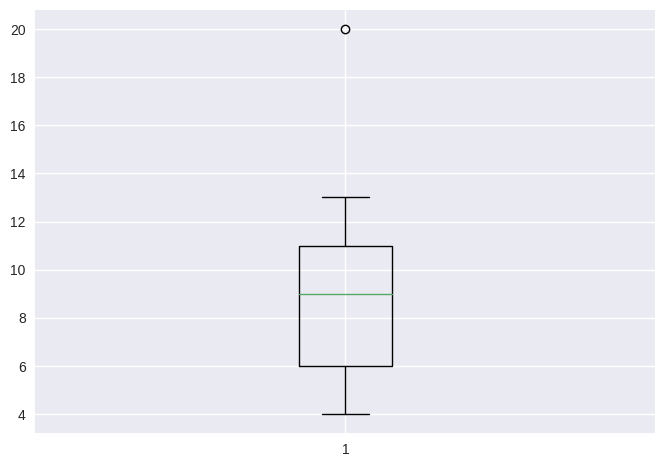

In [202]:
# Gráfico Box Plot

plt.boxplot(df["Tempo_envio"])

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

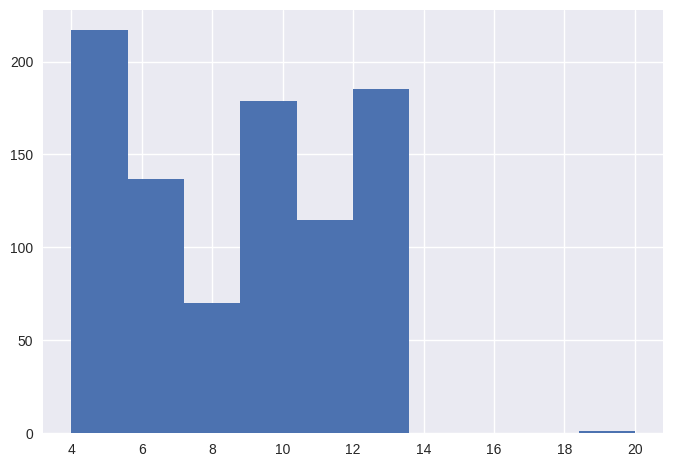

In [203]:
# Gráfico Histograma

plt.hist(df["Tempo_envio"])

In [204]:
# Tempo Mínimo de envio

df["Tempo_envio"].min()

4

In [205]:
# Identificando o Outlier
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [206]:
# Salvando em .csv sem levar o index
df.to_csv("df_novo.csv", index= False)